In [121]:
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
df = pd.read_csv('polynomial.csv')

In [145]:
df

,Temperature,Ice Cream Sales
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


In [123]:
df.head(3)

,Temperature,Ice Cream Sales
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001


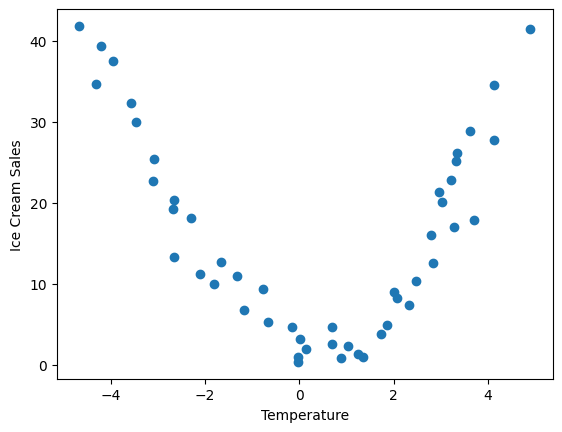

In [124]:
plt.scatter(df['Temperature'],df['Ice Cream Sales'])
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Sales")
plt.show()

In [125]:
df.corr()

,Temperature,Ice Cream Sales
Temperature,1.000000,-0.175184
Ice Cream Sales,-0.175184,1.000000


In [126]:
# feature
x = df[['Temperature']]

In [127]:
# label
y = df['Ice Cream Sales']

In [128]:
from sklearn.preprocessing import PolynomialFeatures

In [129]:
pl = PolynomialFeatures(degree=2)

In [130]:
pl.fit(x)

PolynomialFeatures()

In [131]:
x = pl.transform(x)

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
lr = LinearRegression()

In [136]:
lr.fit(x_train,y_train)

LinearRegression()

In [137]:
lr.score(x_test,y_test)

0.8430551373706655

In [138]:
prd = lr.predict(x)

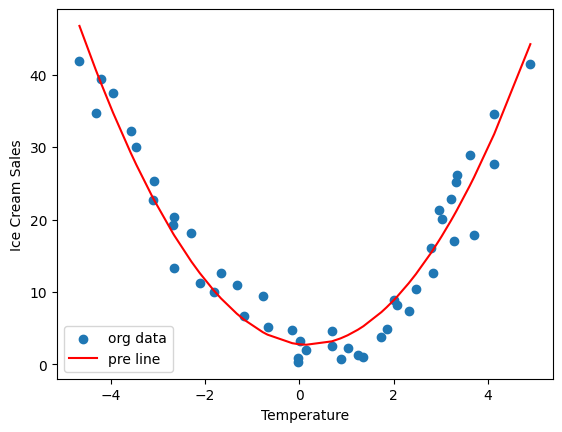

In [139]:
plt.scatter(df['Temperature'],df['Ice Cream Sales'],label = "org data")
plt.plot(df['Temperature'],prd,c="red",label="pre line")
plt.legend()
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Sales")
plt.show()

In [140]:
lr.coef_

array([ 0.        , -0.70641926,  1.87145125])

In [141]:
lr.intercept_

2.7683058308314497

In [142]:
# equation 
# y = m1x1 + m2x2^2 + c
# y = -2.28983499e-16*x1 + -7.90095957e-01*x2^2 + 1.1128471232871782

In [146]:
test = pl.transform([[3]])
test

C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1., 3., 9.]])

In [147]:
lr.predict(test)

array([17.4921093])

In [151]:
df.iloc[45]

Temperature         3.704057
Ice Cream Sales    17.843957
Name: 45, dtype: float64